In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
Nx=1000

x,dx = np.linspace(-5,5,Nx+1,retstep=True)

In [3]:
def potencial(x,m=1,w=1):
    
    vx=(1/2)*(m*w**2 *x**2)
    return vx

def steps(psi_1,psi_2,k1,k2,k3,h):

    h1 = 2*(1-5/12. * h**2 * k2**2)*psi_2
    h2 = (1+1/12.*h**2*k1**2)*psi_1
    h3= 1 + 1/12. *h**2 *k3**2
    return (h1-h2)/h3

def numerov(E, x, N, dx, h=1, m=1):
    psi = np.zeros(N+1)
    psi[0] = 0
    psi[1] = 1e-5  
    
    T = np.zeros(N+1)
    for i in range(len(T)):
        T[i] = 2 * m * (E - potencial(x[i])) / h**2
        
    for j in np.arange(2, N):
         psi[j] =steps(psi[j - 2], psi[j - 1], T[ j -2], T[j - 1], T[j], dx)
    
    return psi

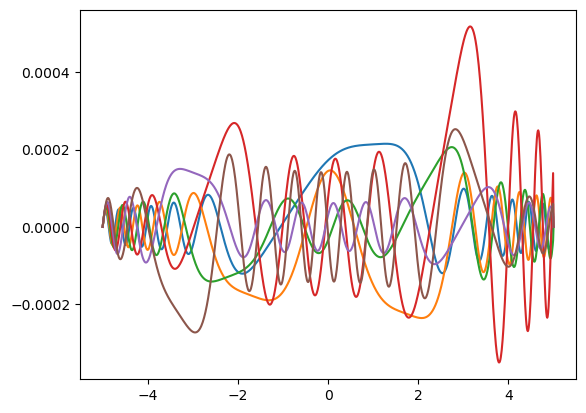

In [6]:
E=[0.5,1.5,2.5,3.5,4.5,5.5]
plt.figure()
for i in E:
    psi=numerov(i,x,Nx,dx)

    
    plt.plot(x,psi)
plt.show()